# Multiple Linear Regression

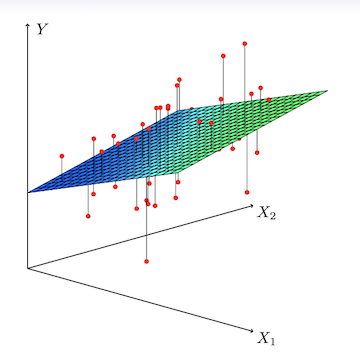

## Multi-collinearity
- is the case in which independent variables are correlated with each other creating unstable models by inflating the magnitude of coefficients/estimates.


- It also becomes difficult to determine which variable is contributing to predict the response variable. 


- VIF is calculated for each independent variable by calculating the R-squared value with respect to all the other independent variables and tries to eliminate which variable has the highest VIF value one by one:


$$ VIF = \frac{R}{1-R^2} $$


- How to diagnose: Look into scatter plots, run correlation coefficient on all the variables of data. Calculate the variance inflation factor (VIF). If VIF <= 4 suggests no multi-collinearity, in banking scenarios, people use VIF <= 2 also!

In [18]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

In [19]:
wine_quality = pd.read_csv("winequality-red.csv",sep=';')
# Step for converting white space in columns to _ value for better handling
wine_quality.rename(columns=lambda x: x.replace(" ", "_"),
inplace=True)
wine_quality.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


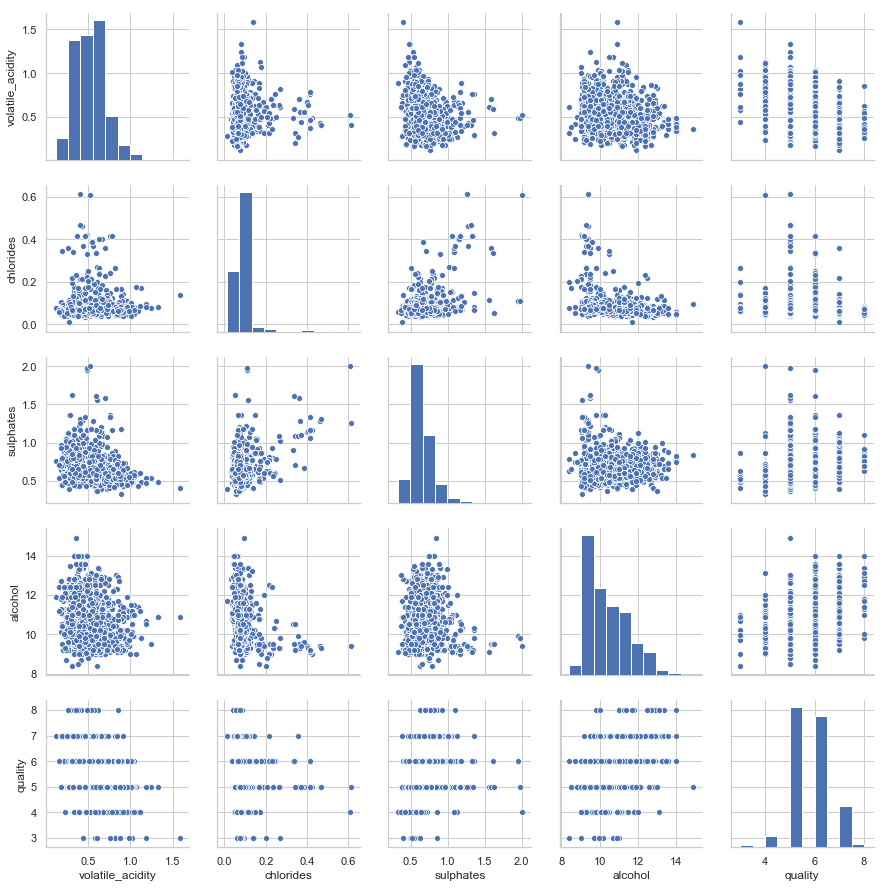

In [20]:
# Pair plots for sample five variables are shown as follows; you should try various 
# combinations to check various relationships visually between the various other variables
eda_colnms = [ 'volatile_acidity', 'chlorides', 'sulphates',
'alcohol','quality']
# Plots - pair plots
sns.set(style='whitegrid',context = 'notebook')
sns.pairplot(wine_quality[eda_colnms],height = 2.5,x_vars= eda_colnms,
y_vars= eda_colnms)
plt.show()

#### Correlation Plots

- In addition to visual plots, correlation coefficients are calculated to show the level of correlation in numeric terminology; these charts are used to drop variables in the initial stage, if there are many of them to start with:


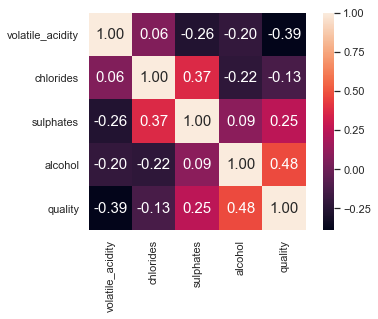

In [21]:
# Correlation coefficients
corr_mat = np.corrcoef(wine_quality[eda_colnms].values.T)
sns.set(font_scale=1)
full_mat = sns.heatmap(corr_mat, cbar=True, annot=True, square=True,fmt='.2f',annot_kws={'size': 15}, yticklabels=eda_colnms,xticklabels=eda_colnms)
plt.show()

### Backward and Forward Selection

- In the backward method, iterations start with considering all the variables and we will remove variables one by one until all the prescribed statistics are met.

- In the case of forward, we will start with no variables and keep on adding significant variables until the overall model's fit improves.

### Using Backward Selection

### Iteration 1

In [45]:
colnms = ['fixed_acidity', 'volatile_acidity', 'citric_acid',
'residual_sugar', 'chlorides', 'free_sulfur_dioxide',
'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol']
pdx = wine_quality[colnms]
pdy = wine_quality["quality"]

In [46]:
#Create the train and test data by randomly performing the data split. The random_state
#(random seed) is used for reproducible results:
x_train,x_test,y_train,y_test = train_test_split(pdx, pdy, train_size =0.7, random_state = 42)

In [47]:
#In the following code, adding constant means creating an intercept variable. If we do not
#create an intercept, the coefficients will change accordingly:
x_train_new = sm.add_constant(x_train)
x_test_new = sm.add_constant(x_test)
full_mod = sm.OLS(y_train,x_train_new)

In [48]:
#The following code creates a model summary including R-squared, adjusted R-squared, and
#the p-value of independent variables:
full_res = full_mod.fit()
print ("\n \n",full_res.summary())


 
                             OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.355
Method:                 Least Squares   F-statistic:                     56.90
Date:                Wed, 07 Aug 2019   Prob (F-statistic):          8.34e-100
Time:                        10:29:55   Log-Likelihood:                -1103.5
No. Observations:                1119   AIC:                             2231.
Df Residuals:                    1107   BIC:                             2291.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   17.9

In [49]:
from sklearn.metrics import mean_squared_error
y_pred = full_res.predict(x_test_new)
MSE=mean_squared_error(y_test, y_pred)
MSE

0.4112348717504305

In [50]:
#Calculate VIF for all individual variables. 
print ("\nVariance Inflation Factor")
cnames = x_train.columns
for i in np.arange(0,len(cnames)):
    xvars = list(cnames)
    yvar = xvars.pop(i)
    mod = sm.OLS(x_train[yvar],sm.add_constant( x_train_new[xvars]))
    res = mod.fit()
    vif = 1/(1-res.rsquared)
    print (yvar,round(vif,3))


Variance Inflation Factor
fixed_acidity 7.189
volatile_acidity 1.824
citric_acid 3.139
residual_sugar 1.742
chlorides 1.463
free_sulfur_dioxide 1.973
total_sulfur_dioxide 2.205
density 5.902
pH 3.224
sulphates 1.428
alcohol 2.93


### Key Metrics
- When training model focus on the model AIC, adjusted R-squared, an individual variable's P>|t|, and VIF values. 
- Any model would be considered as good to go having the following thumb rule criteria:
  - AIC: No absolute value is significant. It is a relative measure, the lower the better.
  - Adjusted R-squared: It is ≥ 0.7.
  - Individual variable's p-value (P>|t|): It is ≤ 0.05.
  - Individual variable's VIF: It is ≤ 5 

## Results 
- residual_sugar has highest the p-value of 0.668 
- fixed_acidity has the highest VIF value of 7.189.

### Iteration 2

In [32]:
# Let's rerun model with residual_sugar removed

colnms = ['fixed_acidity', 'volatile_acidity', 'citric_acid',
 'chlorides', 'free_sulfur_dioxide',
'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol']
pdx = wine_quality[colnms]
pdy = wine_quality["quality"]

x_train,x_test,y_train,y_test = train_test_split(pdx, pdy, train_size =0.7, random_state = 42)

x_train_new = sm.add_constant(x_train)
x_test_new = sm.add_constant(x_test)
full_mod = sm.OLS(y_train,x_train_new)

full_res = full_mod.fit()
print ("\n \n",full_res.summary())
print ("\nVariance Inflation Factor")
cnames = x_train.columns
for i in np.arange(0,len(cnames)):
    xvars = list(cnames)
    yvar = xvars.pop(i)
    mod = sm.OLS(x_train[yvar],sm.add_constant( x_train_new[xvars]))
    res = mod.fit()
    vif = 1/(1-res.rsquared)
    print (yvar,round(vif,3))


 
                             OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.355
Method:                 Least Squares   F-statistic:                     62.62
Date:                Wed, 07 Aug 2019   Prob (F-statistic):          1.12e-100
Time:                        10:03:28   Log-Likelihood:                -1103.6
No. Observations:                1119   AIC:                             2229.
Df Residuals:                    1108   BIC:                             2284.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   11.3

### Iteration 3

In [34]:
# Let's rerun model with density removed

colnms = ['fixed_acidity', 'volatile_acidity', 'citric_acid',
 'chlorides', 'free_sulfur_dioxide',
'total_sulfur_dioxide', 'pH', 'sulphates', 'alcohol']
pdx = wine_quality[colnms]
pdy = wine_quality["quality"]

x_train,x_test,y_train,y_test = train_test_split(pdx, pdy, train_size =0.7, random_state = 42)

x_train_new = sm.add_constant(x_train)
x_test_new = sm.add_constant(x_test)
full_mod = sm.OLS(y_train,x_train_new)

full_res = full_mod.fit()
print ("\n \n",full_res.summary())
print ("\nVariance Inflation Factor")
cnames = x_train.columns
for i in np.arange(0,len(cnames)):
    xvars = list(cnames)
    yvar = xvars.pop(i)
    mod = sm.OLS(x_train[yvar],sm.add_constant( x_train_new[xvars]))
    res = mod.fit()
    vif = 1/(1-res.rsquared)
    print (yvar,round(vif,3))


 
                             OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     69.62
Date:                Wed, 07 Aug 2019   Prob (F-statistic):          1.40e-101
Time:                        10:05:37   Log-Likelihood:                -1103.6
No. Observations:                1119   AIC:                             2227.
Df Residuals:                    1109   BIC:                             2277.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    4.0

### Iteration 4

In [35]:
# Let's rerun model with fixed acidity removed

colnms = [ 'volatile_acidity', 'citric_acid',
 'chlorides', 'free_sulfur_dioxide',
'total_sulfur_dioxide', 'pH', 'sulphates', 'alcohol']
pdx = wine_quality[colnms]
pdy = wine_quality["quality"]

x_train,x_test,y_train,y_test = train_test_split(pdx, pdy, train_size =0.7, random_state = 42)

x_train_new = sm.add_constant(x_train)
x_test_new = sm.add_constant(x_test)
full_mod = sm.OLS(y_train,x_train_new)

full_res = full_mod.fit()
print ("\n \n",full_res.summary())
print ("\nVariance Inflation Factor")
cnames = x_train.columns
for i in np.arange(0,len(cnames)):
    xvars = list(cnames)
    yvar = xvars.pop(i)
    mod = sm.OLS(x_train[yvar],sm.add_constant( x_train_new[xvars]))
    res = mod.fit()
    vif = 1/(1-res.rsquared)
    print (yvar,round(vif,3))


 
                             OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     78.33
Date:                Wed, 07 Aug 2019   Prob (F-statistic):          1.77e-102
Time:                        10:16:23   Log-Likelihood:                -1103.8
No. Observations:                1119   AIC:                             2226.
Df Residuals:                    1110   BIC:                             2271.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    4.2

### Iteration 5

In [51]:
# Let's rerun model with citric acid removed

colnms = [ 'volatile_acidity', 'chlorides', 'free_sulfur_dioxide','total_sulfur_dioxide', 'pH', 'sulphates', 'alcohol']
pdx = wine_quality[colnms]
pdy = wine_quality["quality"]

x_train,x_test,y_train,y_test = train_test_split(pdx, pdy, train_size =0.7, random_state = 42)

x_train_new = sm.add_constant(x_train)
x_test_new = sm.add_constant(x_test)
full_mod = sm.OLS(y_train,x_train_new)

full_res = full_mod.fit()
print ("\n \n",full_res.summary())
print ("\nVariance Inflation Factor")
cnames = x_train.columns
for i in np.arange(0,len(cnames)):
    xvars = list(cnames)
    yvar = xvars.pop(i)
    mod = sm.OLS(x_train[yvar],sm.add_constant( x_train_new[xvars]))
    res = mod.fit()
    vif = 1/(1-res.rsquared)
    print (yvar,round(vif,3))


 
                             OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.360
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     89.21
Date:                Wed, 07 Aug 2019   Prob (F-statistic):          4.31e-103
Time:                        10:30:11   Log-Likelihood:                -1104.7
No. Observations:                1119   AIC:                             2225.
Df Residuals:                    1111   BIC:                             2266.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    3.9

- **AIC:** Reduced from 2231 from iteration 1 to 2225 in iteration 5.


- **Adjusted R-squared:** Value changed to 0.356, which is a slight improvement but not worth enough!


- **Individual variable's p-value (P>|t|):** None of the variables are insignificant; all values are less than 0.05.


- **Individual variable's VIF:** All variables are less than five. Hence, we do not need to remove any further variable based on VIF value.

**no strong linear relationship between the dependent and independent variables exists.**

In [52]:
from sklearn.metrics import mean_squared_error
y_pred = full_res.predict(x_test_new)
MSE=mean_squared_error(y_test, y_pred)
MSE

0.4109065534664781